In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses

In [2]:
DATA_PATH="./Vowel_Data/Formant/"
n_time_sample=25

In [3]:
seed=0

In [51]:
def get_labels(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    label_indices=np.arange(0,len(labels))
    return labels, label_indices, to_categorical(label_indices)

def get_formant(file_path,max_len=n_time_sample):
    formant=np.genfromtxt(fname=file_path,missing_values="--undefined--",filling_values=0.)
    if (max_len > formant.shape[0]):
        pad_width=max_len-formant.shape[0]
        formant=np.pad(formant,pad_width=((0,0),(0,pad_width)),mode='constant')
    else:
        formant=formant[:max_len,:]
    return formant

def save_data_to_array(path=DATA_PATH, max_len=n_time_sample):
    labels,_,_=get_labels(path)

    for label in labels:
        formant_vectors=[]

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Saving vectors to label -'{}'".format(label)):
            formant=get_formant(file_path=file)
            formant_vectors.append(formant)
            
        np.save(label+'.npy',formant_vectors)
        
def get_train_test(split_ratio=0.8,random_state=42):
    labels,indices,_=get_labels(DATA_PATH)

    X=np.load(labels[0]+'.npy')
    y=np.zeros(X.shape[0])

    for i,label in enumerate(labels[1:]):
        x=np.load(label+'.npy')
        X=np.vstack((X,x))
        y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [30]:
path=DATA_PATH
labels,_,_=get_labels(path)

for label in labels:
    formant_vectors=[]

    formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
    for file in tqdm(formant_files,"Saving vectors to label -'{}'".format(label)):
        formant=get_formant(file_path=file)
        print(file)
        formant_vectors.append(formant)

Saving vectors to label -'Formant4':   0%|          | 0/40 [00:00<?, ?it/s]

./Vowel_Data/Formant/Formant1/vowel1_10_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_11_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_12_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_13_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_14_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_15_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_16_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_17_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_18_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_19_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_1_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_20_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_21_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_22_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_23_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_24_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_25_Formant_frq.txt
./Vowel_Data/Formant/Formant1/vowel1_26_Formant_f

Saving vectors to label -'Formant7':   0%|          | 0/40 [00:00<?, ?it/s]

./Vowel_Data/Formant/Formant4/vowel4_10_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_11_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_12_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_13_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_14_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_15_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_16_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_17_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_18_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_19_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_1_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_20_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_21_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_22_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_23_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_24_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_25_Formant_frq.txt
./Vowel_Data/Formant/Formant4/vowel4_26_Formant_f

Saving vectors to label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 613.40it/s]

./Vowel_Data/Formant/Formant7/vowel7_32_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_33_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_34_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_35_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_36_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_37_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_38_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_39_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_3_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_40_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_4_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_5_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_6_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_7_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_8_Formant_frq.txt
./Vowel_Data/Formant/Formant7/vowel7_9_Formant_frq.txt


In [42]:
d=np.load("Formant2.npy")

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [53]:
save_data_to_array()

Saving vectors to label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 877.09it/s]


In [54]:
np.random.seed(seed)

X_train, X_test, y_train, y_test=get_train_test()
tot_no_FORMANT=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape((X_train.shape[0],tot_no_FORMANT))
X_test=X_test.reshape(X_test.shape[0],tot_no_MFCC)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [136]:
model_v=Sequential()
model_v.add(Dense(128, activation='tanh', input_shape=(tot_no_MFCC,)))
model_v.add(Dense(64, activation='tanh'))
model_v.add(Dense(32, activation='tanh'))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

In [137]:
model_v.compile(
    optimizer=opt.SGD(learning_rate=0.005,momentum=0.9),
    #optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [138]:
history_v=model_v.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
1/1 [==============================] - 0s 143ms/step - loss: 2.3232 - accuracy: 0.1116 - val_loss: 2.2034 - val_accuracy: 0.1250
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 2.1699 - accuracy: 0.1339 - val_loss: 2.1249 - val_accuracy: 0.1250
Epoch 3/50
1/1 [==============================] - 0s 70ms/step - loss: 2.0931 - accuracy: 0.1652 - val_loss: 2.1270 - val_accuracy: 0.0714
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 2.0190 - accuracy: 0.1384 - val_loss: 2.0231 - val_accuracy: 0.1607
Epoch 5/50
1/1 [==============================] - 0s 61ms/step - loss: 1.9219 - accuracy: 0.2277 - val_loss: 1.8979 - val_accuracy: 0.2679
Epoch 6/50
1/1 [==============================] - 0s 68ms/step - loss: 1.8228 - accuracy: 0.2946 - val_loss: 1.8661 - val_accuracy: 0.3036
Epoch 7/50
1/1 [==============================] - 0s 53ms/step - loss: 1.7973 - accuracy: 0.3482 - val_loss: 1.8427 - val_accuracy: 0.3214
Epoch 8/50
1/1 [==========

In [139]:
history_dict=history_v.history

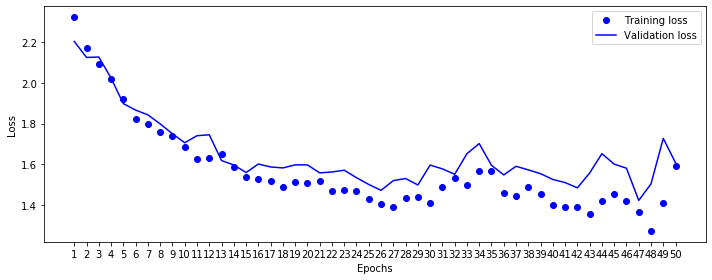

In [140]:
loss_v=history_dict['loss']
val_loss_v=history_dict['val_loss']
epochs=range(1,len(loss_v)+1)

plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'bo',label='Training loss')
plt.plot(epochs,val_loss_v,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/loss_vowel_128_64_32_16_tanh_softmax_adam_batch200.svg',format='svg', dpi=600)

<Figure size 432x288 with 0 Axes>

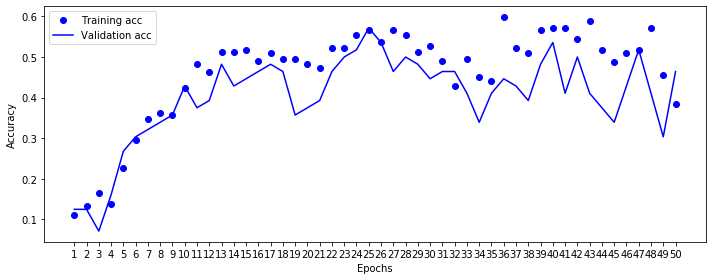

In [141]:
plt.clf()
acc_v=history_dict['accuracy']
val_acc_v=history_dict['val_accuracy']

plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'bo',label='Training acc')
plt.plot(epochs,val_acc_v,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/accuracy_vowel_128_64_32_16_tanh_softmax_adam_batch200.svg',format='svg', dpi=600)

In [81]:
DATA_PATH="./Word_Data/Word/"
n_time_sample=44

In [82]:
def get_labels(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    label_indices=np.arange(0,len(labels))
    return labels, label_indices, to_categorical(label_indices)

def speech2mfcc(file_path,max_len=n_time_sample):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    mfcc=librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_MFCC)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')
    else:
        mfcc=mfcc[:,:max_len]
    return mfcc

def save_data_to_array(path=DATA_PATH, max_len=n_time_sample):
    labels,_,_=get_labels(path)

    for label in labels:
        mfcc_vectors=[]

        speechfiles=[path + label + '/' + speech for speech in sorted(os.listdir(path+'/'+label))]
        for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
            mfcc=speech2mfcc(speech,max_len=max_len)
            mfcc_vectors.append(mfcc)
            
        np.save(label+'.npy',mfcc_vectors)
        
def get_train_test(split_ratio=0.8,random_state=seed):
    labels,indices,_=get_labels(DATA_PATH)

    X=np.load(labels[0]+'.npy')
    y=np.zeros(X.shape[0])

    for i,label in enumerate(labels[1:]):
        x=np.load(label+'.npy')
        X=np.vstack((X,x))
        y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [83]:
save_data_to_array()

Saving vectors to label -'Word7': 100%|██████████| 40/40 [00:00<00:00, 105.70it/s]


In [106]:
np.random.seed(seed)

X_train, X_test, y_train, y_test=get_train_test()
tot_no_MFCC=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape((X_train.shape[0],-1))
X_test=X_test.reshape(X_test.shape[0],-1)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [119]:
model_w=Sequential()
model_w.add(Dense(128, activation='tanh', input_shape=(tot_no_MFCC,)))
model_w.add(Dense(64, activation='tanh'))
model_w.add(Dense(32, activation='tanh'))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

In [120]:
model_w.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    #loss=losses.CategoricalCrossentropy(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [121]:
history_w=model_w.fit(X_train, y_train_hot, epochs=50, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/50
1/1 [==============================] - 0s 150ms/step - loss: 2.1414 - accuracy: 0.1116 - val_loss: 1.9797 - val_accuracy: 0.1964
Epoch 2/50
1/1 [==============================] - 0s 56ms/step - loss: 1.8981 - accuracy: 0.2366 - val_loss: 1.9269 - val_accuracy: 0.2143
Epoch 3/50
1/1 [==============================] - 0s 65ms/step - loss: 1.8685 - accuracy: 0.2277 - val_loss: 1.8362 - val_accuracy: 0.2857
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 1.7987 - accuracy: 0.3348 - val_loss: 1.7761 - val_accuracy: 0.3393
Epoch 5/50
1/1 [==============================] - 0s 62ms/step - loss: 1.6728 - accuracy: 0.3973 - val_loss: 1.7242 - val_accuracy: 0.3571
Epoch 6/50
1/1 [==============================] - 0s 79ms/step - loss: 1.6092 - accuracy: 0.3705 - val_loss: 1.6231 - val_accuracy: 0.4464
Epoch 7/50
1/1 [==============================] - 0s 71ms/step - loss: 1.5280 - accuracy: 0.4866 - val_loss: 1.6170 - val_accuracy: 0.4286
Epoch 8/50
1/1 [==========

In [88]:
history_dict=history_w.history

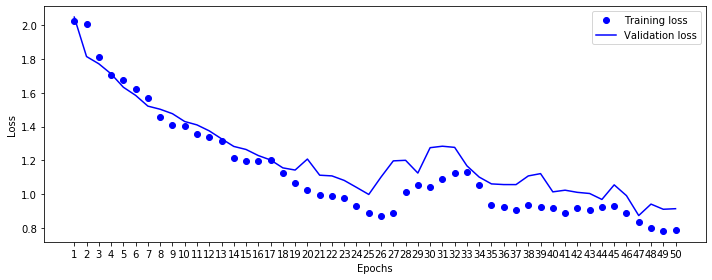

In [89]:
loss_w=history_dict['loss']
val_loss_w=history_dict['val_loss']
epochs=range(1,len(loss_v)+1)

plt.figure(figsize=(10,4))
plt.plot(epochs,loss_w,'bo',label='Training loss')
plt.plot(epochs,val_loss_w,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/loss_vowel_128_64_32_16_tanh_softmax_adam_batch200.svg',format='svg', dpi=600)

<Figure size 432x288 with 0 Axes>

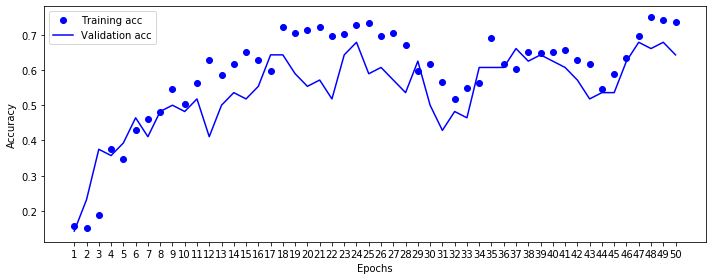

In [90]:
plt.clf()
acc_w=history_dict['accuracy']
val_acc_w=history_dict['val_accuracy']

plt.figure(figsize=(10,4))
plt.plot(epochs,acc_w,'bo',label='Training acc')
plt.plot(epochs,val_acc_w,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/accuracy_vowel_128_64_32_16_tanh_softmax_adam_batch200.svg',format='svg', dpi=600)

In [91]:
#COMPARE

In [92]:
epochs=range(1,len(loss_v)+1)

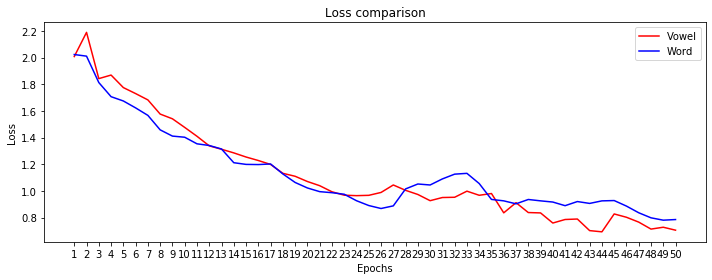

In [93]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'r',label='Vowel')
plt.plot(epochs,loss_w,'b',label='Word')
plt.title('Loss comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/loss_compare_diff_len_128_64_32_16_tanh_softmax_rmsprop_batch128'+'.svg',format='svg',dpi=600)

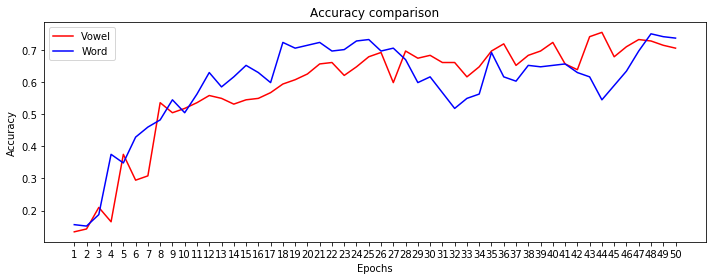

In [94]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_v,'r',label='Vowel')
plt.plot(epochs,acc_w,'b',label='Word')
plt.title('Accuracy comparison')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
#plt.savefig('./Result/New_without_CNN/accuracy_compare_diff_len_128_64_32_16_tanh_softmax_rmsprop_batch128'+'.svg',format='svg',dpi=600)